In [1]:
import pandas as pd
import numpy as np
import pyclustertend 
import random
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import sklearn.preprocessing
from sklearn.datasets import make_classification
from sklearn.cluster import Birch
import matplotlib.pyplot as plt

### Pregunta 1

In [8]:
movies = pd.read_csv('movies.csv', encoding = "ISO-8859-1")
columns = list(movies.describe().columns[1:])
# columns.append('actorsPopularity')
columns.append('castWomenAmount')
columns.append('castMenAmount')

variables = movies.loc[:, movies.columns.isin(columns)]
for index, row in variables.iterrows():
  try:
    # Aqui se observa si los datos tienen sentido
    if (
      row['budget'] >= 300000000 or 
      row['revenue'] >= 1200000000 or
      row['runtime'] >= 300 or
      row['popularity'] >= 900 or
      row['voteCount'] >= 20000 or
      row['genresAmount'] >= 10 or
      row['productionCoAmount'] >= 25 or
      row['productionCountriesAmount'] >= 20 or
      row['actorsAmount'] >= 200 or
      int(row['castWomenAmount']) >= 55 or
      int(row['castMenAmount']) >= 100
    ):
      variables = variables.drop(index=index)
  except:
    variables = variables.drop(index=index)

variables = variables.astype({'castWomenAmount': int, 'castMenAmount': int})
normalized_variables =(variables-variables.mean())/variables.std()
print(normalized_variables)

        budget   revenue   runtime  popularity   voteAvg  voteCount  \
0    -0.417486 -0.393161 -0.129247   -0.305717 -0.852824   0.312545   
1     0.067758 -0.331501  0.355556   -0.465584  0.005623  -0.474116   
2    -0.217680  5.641264  0.799960    0.815265  1.829823   6.473875   
3     2.151452  6.931953 -0.048447    1.303083  1.400599   6.189591   
5    -0.103505  2.361660  0.840360   -0.125661  1.615211   3.653521   
...        ...       ...       ...         ...       ...        ...   
9991 -0.531661 -0.426476 -4.088477   -0.197080 -4.823141  -0.568312   
9992 -0.531661 -0.426476 -0.977654    1.568315  1.078682  -0.559401   
9995 -0.531661 -0.426476 -0.048447   -0.365476  0.327541  -0.522911   
9996 -0.531661 -0.426476 -0.169648    6.364752 -5.359671  -0.567887   
9999 -0.524410 -0.424489 -4.088477    0.584957 -1.925883  -0.567463   

      genresAmount  productionCoAmount  productionCountriesAmount  \
0        -0.556564           -0.531374                  -0.484929   
1        

### Pregunta 2

In [24]:
random.seed(123)
X_scale=sklearn.preprocessing.scale(variables)

pyclustertend.hopkins(X_scale, len(X_scale))

0.08521944526837484

El valor de hopkins es de 0.085, por lo que vale la pena hacer el agrupamiento.

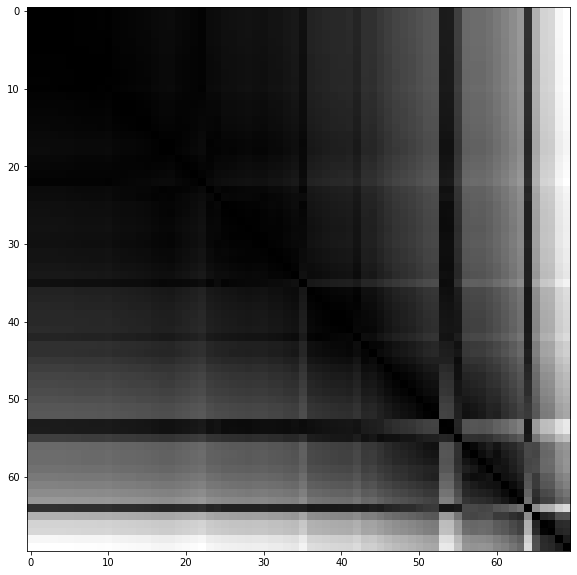

In [58]:
pyclustertend.vat(variables[:70])

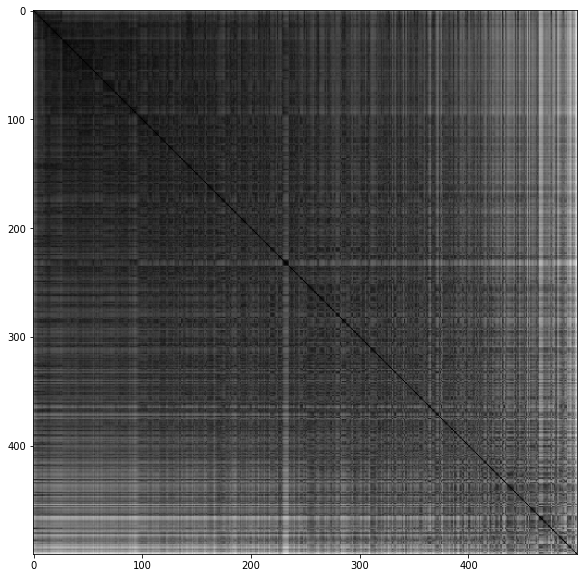

In [59]:
pyclustertend.vat(X_scale[:500])

### Pregunta 3

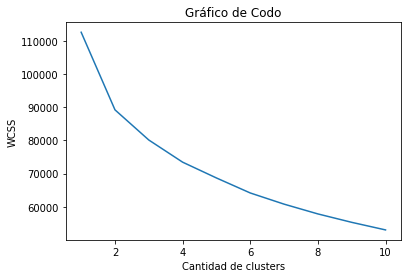

In [60]:
numeroClusters = range(1,11)

wcss = []
# Obtenemos 10 posibles clusters
for i in numeroClusters:
    # Se calcula la kmean con esa cantidad de clusters
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(X_scale)
    # Obtenemos la inercia
    wcss.append(kmeans.inertia_)

# Graficando
plt.plot(numeroClusters, wcss)
plt.xlabel("Cantidad de clusters")
plt.ylabel("WCSS")
plt.title("Gráfico de Codo")
plt.show()

### Pregunta 4 - Metodo de BIRCH
Referencia de: https://www.freecodecamp.org/espanol/news/8-algoritmos-de-agrupacion-en-clusteres-en-el-aprendizaje-automatico-que-todos-los-cientificos-de-datos-deben-conocer/

[-0.4175085   0.06776127 -0.21769154 ... -0.53168962 -0.53168962
 -0.52443752]


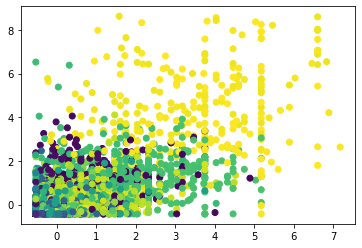

In [57]:
# Inicializar el modelo
birch_model = Birch(threshold=0.03, n_clusters=None)
birch_model.fit(X_scale)

# Obtenemos los puntos y los clusters
birch_result = birch_model.predict(X_scale)

# Graficar los clusters
plt.scatter(X_scale[:, 0], X_scale[:, 1], c = birch_result)
plt.show()